En este archivo se analizan las observaciones de asteroides troyanos de las bases de datos de Gaia DR2 y DR3 y SDSS.


Notas: 
    
En esta ocasión se ha tenido en cuenta las tres bases de datos a la hora de contabilizar los asteroides comunes a ambas, por lo que hay una cantidad menor que en el análisis inicial en el que solo contábamos con Gaia DR2 y SDSS.

In [2]:
import os
from pandas import read_csv, DataFrame
import numpy as np
import pandas as pd
import pyedra
import matplotlib.pyplot as plt
import seaborn as sn

path = os.getcwd()


In [3]:
df = read_csv(path+"/Datos/Jupiter_trojans.csv")
df_Gaia_all = read_csv(path+"/Datos/Jupiter_trojans_Gaia.csv")
df_Gaia = read_csv(path+"/Datos/Jupiter_trojans_Gaia_matching.csv")
df_SDSS = read_csv(path+"/Datos_Sloan/SDSS_trojans.csv")

df_GaiaDR2 = read_csv(path+"/Datos_Gaia/Gaia_DR2_trojans.csv")
df_GaiaDR3 = read_csv(path+"/Datos_Gaia/Gaia_DR3_trojans.csv")

In [3]:
print('Total of asteroids and observations')
dfGaiaDR2 = read_csv(path+"/Datos_Gaia/Gaia_DR2_completed.csv")
print('\nGaia DR2:\n', len(dfGaiaDR2.loc[:,'Number'].drop_duplicates()), 'asteroids with a total of',len(dfGaiaDR2),'observations')
dfGaiaDR3 = read_csv(path+"/Datos_Gaia/Gaia_DR3_completed.csv")
print('\nGaia DR3:\n', len(dfGaiaDR3.loc[:,'number_mp'].drop_duplicates()), 'asteroids with a total of',len(dfGaiaDR3),'observations')
dfSDSSall = read_csv(path+"/Datos_Sloan/SDSS_completed.csv")
print('\nSDSS:\n', len(dfSDSSall.loc[:,'Number'].drop_duplicates()), 'asteroids with a total of',len(dfSDSSall),'observations')

Total of asteroids and observations

Gaia DR2:
 13981 asteroids with a total of 131218 observations

Gaia DR3:
 23433 asteroids with a total of 393461 observations

SDSS:
 73250 asteroids with a total of 147057 observations


In [257]:
print('Total of Jupiter Trojans and observations')
print('\nGaia DR2:\n', len(df_GaiaDR2.loc[:,'Number'].drop_duplicates()), 'asteroids with a total of',len(df_GaiaDR2),'observations')
print('\nGaia DR3:\n', len(df_GaiaDR3.loc[:,'Number'].drop_duplicates()), 'asteroids with a total of',len(df_GaiaDR3),'observations')
print('\nSDSS:\n', len(df_SDSS.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(df_SDSS),'observations')

Total of Jupiter Trojans and observations

Gaia DR2:
 183 asteroids with a total of 2782 observations

Gaia DR3:
 247 asteroids with a total of 4770 observations

SDSS:
 703 asteroids with a total of 1055 observations


####  Catálogo completo

Se aplica el código Pyedra para determinar los parámetros de la función de fase a partir de los datos de fase (alpha) y la magnitud V de Johnson reducida (v) calculada anteriormente para cada catálogo.

Luego se determina la magnitud V (V_fit) a partir de los valores de H y G obtenidos (H_fit y G_fit).

Para aplicar el código se deben tener mínimo 2 observaciones.

In [4]:
df_all = read_csv(path+"/Datos/Jupiter_trojans.csv")

### Eliminar asteroides con menos de dos observaciones
index = np.array(np.where(df_all.id.duplicated(keep=False)))
df_all = df_all.iloc[index[0]]

### Implementar código Pyedra
HG_all = pyedra.HG_fit(df_all, idc="id", alphac="alpha", magc="v")


##Rellenar tabla original con H, G (con error porcentual) y V ajustados

# errores porcentuales
HG_all.loc[:,'%error_H'] = np.abs(HG_all.loc[:,'error_H']/HG_all.loc[:,'H']*100)
HG_all.loc[:,'%error_G'] = np.abs(HG_all.loc[:,'error_G']/HG_all.loc[:,'G']*100)

# H y G (con %error)
HG_all.rename(columns={'H': 'H_fit','G':'G_fit','R':'r'}, inplace=True)
df_all = pd.merge(df_all, HG_all, on=('id'), how='outer')

# V  
V = df_all.loc[:,'v']
Phase = df_all.loc[:,'alpha']
H = df_all.loc[:,'H_fit']
G = df_all.loc[:,'G_fit']

def V_fit(alpha, H, G):                                        
    x = alpha * np.pi / 180
    y = H - 2.5 * np.log10(
        (1 - G) * np.exp(-3.33 * np.tan(x / 2) ** 0.63)
        + G * np.exp(-1.87 * np.tan(x / 2) ** 1.22))
    return y
df_all['V_fit'] = V_fit(Phase, H, G)

display(df_all)

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_m

C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\sa

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_m

C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,id,jd,a_orb,e_orb,i_orb,Delta,R,alpha,umag,...,G,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,NaN,588,2.456893e+06,5.209202,0.147923,10.319917,5.398240,6.064449,7.7575,NaN,...,0.15,7.942679,0.961282,-0.279241,0.595024,0.196752,18,12.102746,213.086475,8.849012
1,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397643,6.057591,7.8178,NaN,...,0.15,7.942679,0.961282,-0.279241,0.595024,0.196752,18,12.102746,213.086475,8.853787
2,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397720,6.058477,7.8101,NaN,...,0.15,7.942679,0.961282,-0.279241,0.595024,0.196752,18,12.102746,213.086475,8.853178
3,NaN,588,2.456892e+06,5.209202,0.147923,10.319917,5.397903,6.060584,7.7916,NaN,...,0.15,7.942679,0.961282,-0.279241,0.595024,0.196752,18,12.102746,213.086475,8.851714
4,NaN,588,2.456893e+06,5.209202,0.147923,10.319917,5.397980,6.061467,7.7839,NaN,...,0.15,7.942679,0.961282,-0.279241,0.595024,0.196752,18,12.102746,213.086475,8.851104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,2013 CB178,390353,2.451961e+06,5.133892,0.111926,30.096112,4.137121,5.068220,4.1637,22.05,...,0.15,13.873063,inf,0.783805,inf,1.000000,2,inf,inf,13.985499
8188,2013 AD70,393059,2.452731e+06,5.165245,0.093502,12.770055,4.381753,5.354184,2.7225,22.43,...,0.15,12.408961,inf,-2.152225,inf,1.000000,2,inf,inf,14.222127
8189,2013 AD70,393059,2.453527e+06,5.165245,0.093502,12.770055,4.673314,5.666940,2.2902,23.07,...,0.15,12.408961,inf,-2.152225,inf,1.000000,2,inf,inf,13.885999
8190,2013 TZ46,412394,2.451815e+06,5.149318,0.063366,27.263493,4.081393,4.950360,6.3638,22.59,...,0.15,13.494623,inf,-0.691843,inf,1.000000,2,inf,inf,14.692241


#### Troyanos comunes 
Se aplica el código Pyedra y se determinan la magnitud V a partir de los parámetros H y G obtenidos solo a los troyanos comunes

In [279]:
## Hallar id de los coincidentes
coinc = pd.merge(df_SDSS.loc[:,'id'], df_Gaia.loc[:,'id'], on=['id'], how='inner')
coinc = coinc.drop_duplicates()
coincidentes = coinc.to_numpy().reshape(1,len(coinc))
print(coincidentes)

## Crear dataframe nuevo
df_match = df[df['id'].isin(coincidentes[0,:])]

### Eliminar asteroides con menos de dos observaciones
index = np.array(np.where(df_match.id.duplicated(keep=False)))
df_match = df_match.iloc[index[0]]

### Implementar código Pyedra
HG_match = pyedra.HG_fit(df_match, idc="id", alphac="alpha", magc="v")


##Rellenar DF con H, G (con error porcentual) y V ajustados

# errores porcentuales
HG_match.loc[:,'%error_H'] = np.abs(HG_match.loc[:,'error_H']/HG_match.loc[:,'H']*100)
HG_match.loc[:,'%error_G'] = np.abs(HG_match.loc[:,'error_G']/HG_match.loc[:,'G']*100)

# H y G (con %error)
HG_match.rename(columns={'H': 'H_fit','G':'G_fit','R':'r'}, inplace=True)
df_match = pd.merge(df_match, HG_match, on=('id'), how='outer')

# V  
V = df_match.loc[:,'v']
Phase = df_match.loc[:,'alpha']
H = df_match.loc[:,'H_fit']
G = df_match.loc[:,'G_fit']

def V_fit(alpha, H, G):                                        
    x = alpha * np.pi / 180
    y = H - 2.5 * np.log10(
        (1 - G) * np.exp(-3.33 * np.tan(x / 2) ** 0.63)
        + G * np.exp(-1.87 * np.tan(x / 2) ** 1.22))
    return y
df_match['V_fit'] = V_fit(Phase, H, G)

display(df_match)

[[  884  2357  2797  3564  4792  4832  5012  5264  5284  6997  7352 11552
  20424 39264]]


,Name,id,jd,a_orb,e_orb,i_orb,Delta,R,alpha,umag,...,G,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,NaN,884,2.457672e+06,5.198113,0.125427,8.905547,5.728069,6.093560,9.1193,NaN,...,0.15,7.994719,1.291797,-0.601412,1.120968,0.126717,22,16.158124,186.389424,9.450287
1,NaN,884,2.457484e+06,5.190181,0.124555,8.913636,5.788117,5.783005,10.0128,NaN,...,0.15,7.994719,1.291797,-0.601412,1.120968,0.126717,22,16.158124,186.389424,9.569403
2,NaN,884,2.457273e+06,5.190181,0.124555,8.913636,5.811536,6.278322,8.5794,NaN,...,0.15,7.994719,1.291797,-0.601412,1.120968,0.126717,22,16.158124,186.389424,9.379152
3,NaN,884,2.457273e+06,5.190181,0.124555,8.913636,5.811536,6.280759,8.5662,NaN,...,0.15,7.994719,1.291797,-0.601412,1.120968,0.126717,22,16.158124,186.389424,9.377419
4,NaN,884,2.457129e+06,5.190181,0.124555,8.913636,5.800064,6.331536,8.1591,NaN,...,0.15,7.994719,1.291797,-0.601412,1.120968,0.126717,22,16.158124,186.389424,9.324083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,NaN,39264,2.457236e+06,5.247983,0.071674,18.181174,5.595960,5.658686,10.4331,NaN,...,0.15,10.718147,0.213114,-0.113135,0.109074,0.706101,30,1.988350,96.410239,11.633612
511,NaN,39264,2.457260e+06,5.247983,0.071674,18.181174,5.598774,6.022789,9.1688,NaN,...,0.15,10.718147,0.213114,-0.113135,0.109074,0.706101,30,1.988350,96.410239,11.559932
512,NaN,39264,2.457399e+06,5.247983,0.071674,18.181174,5.607369,6.175373,7.9443,NaN,...,0.15,10.718147,0.213114,-0.113135,0.109074,0.706101,30,1.988350,96.410239,11.485306
513,NaN,39264,2.457449e+06,5.247983,0.071674,18.181174,5.607329,5.420651,10.2287,NaN,...,0.15,10.718147,0.213114,-0.113135,0.109074,0.706101,30,1.988350,96.410239,11.621906


Información de dataframes:
    
    - df_all / HG_all .......... Información completa/Pyedra de todos los troyanos
    - df_match /HG_match ....... Información completa/Pyedra de los troyanos comunes


In [241]:
print('Total of asteroids and observations')
print('\nAll Jupiter Trojans:\n', len(df_all.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(df_all),'observations')
print('\nShared Jupiter Trojans:\n', len(df_match.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(df_match),'observations')


Total of asteroids and observations

All Jupiter Trojans:
 575 asteroids with a total of 8192 observations

Shared Jupiter Trojans:
 14 asteroids with a total of 515 observations


### Plot inclinación vs semiejemayor

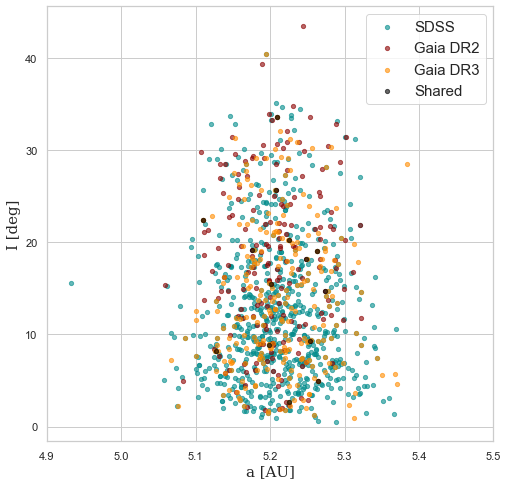

In [73]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(df_SDSS.drop_duplicates(subset=['id'], keep="last").loc[:,'a_orb'],
           df_SDSS.drop_duplicates(subset=['id'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkcyan', label='SDSS')
ax.scatter(df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkred', label='Gaia DR2')
ax.scatter(df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='darkorange', label='Gaia DR3')
ax.scatter(df_match.drop_duplicates(subset=['id'], keep="last").loc[:,'a_orb'],
           df_match.drop_duplicates(subset=['id'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.6,color='black', label='Shared')

plt.xlabel(r'a [AU]', fontsize=15,fontfamily='serif') 
plt.ylabel(r'I [deg]', fontsize=15,fontfamily='serif')
plt.minorticks_on()
plt.xlim(4.9,5.5)
plt.legend( fontsize=15)


### Análisis de errores

Primero se realiza el análisis de los errores sin juntar las bases de datos, diferenciando los asteroides comunes de los demás.

##### Error relativo H y G

Se determinan para todos los asteroides de cada base de datos.

In [258]:
HG_GaiaDR2 = pyedra.HG_fit(df_GaiaDR2, idc="Number", alphac="Phase", magc="V")
HG_GaiaDR3 = pyedra.HG_fit(df_GaiaDR3, idc="Number", alphac="Phase", magc="V")
HG_Gaia_all = pyedra.HG_fit(df_Gaia_all, idc="id", alphac="alpha", magc="v")

# Para SDSS se eliminan los que tienen una única observación
index = np.array(np.where(df_SDSS.id.duplicated(keep=False)))  
df_SDSS = df_SDSS.iloc[index[0]]
HG_SDSS = pyedra.HG_fit(df_SDSS, idc="id", alphac="alpha", magc="v")

# Porcentajes de error
HG_GaiaDR2.loc[:,'%error_H'] = np.abs(HG_GaiaDR2.loc[:,'error_H']/HG_GaiaDR2.loc[:,'H']*100)
HG_GaiaDR2.loc[:,'%error_G'] = np.abs(HG_GaiaDR2.loc[:,'error_G']/HG_GaiaDR2.loc[:,'G']*100)

HG_GaiaDR3.loc[:,'%error_H'] = np.abs(HG_GaiaDR3.loc[:,'error_H']/HG_GaiaDR3.loc[:,'H']*100)
HG_GaiaDR3.loc[:,'%error_G'] = np.abs(HG_GaiaDR3.loc[:,'error_G']/HG_GaiaDR3.loc[:,'G']*100)

HG_Gaia_all.loc[:,'%error_H'] = np.abs(HG_Gaia_all.loc[:,'error_H']/HG_Gaia_all.loc[:,'H']*100)
HG_Gaia_all.loc[:,'%error_G'] = np.abs(HG_Gaia_all.loc[:,'error_G']/HG_Gaia_all.loc[:,'G']*100)

HG_SDSS.loc[:,'%error_H'] = np.abs(HG_SDSS.loc[:,'error_H']/HG_SDSS.loc[:,'H']*100)
HG_SDSS.loc[:,'%error_G'] = np.abs(HG_SDSS.loc[:,'error_G']/HG_SDSS.loc[:,'G']*100)


c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: 

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: 

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: C

C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
 

C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\sa

In [220]:
print('Gaia DR2 \n  Total observaciones:',HG_GaiaDR2.shape[0])
print('  Observaciones con error relativo mayor al 30%:', len(HG_GaiaDR2[HG_GaiaDR2.loc[:,'%error_H'] > 30].index))
print('  Observaciones con error relativo NaN:', len(HG_GaiaDR2[HG_GaiaDR2.loc[:,'%error_H'].isna()].index))

print('\n\nGaia DR3 \n  Total observaciones:',HG_GaiaDR3.shape[0])
print('  Observaciones con error relativo mayor al 30%:', len(HG_GaiaDR3[HG_GaiaDR3.loc[:,'%error_H'] > 30].index))
print('  Observaciones con error relativo NaN:', len(HG_GaiaDR3[HG_GaiaDR3.loc[:,'%error_H'].isna()].index))

print('\n\nSDSS \n  Total observaciones:',HG_SDSS.shape[0])
print('  Observaciones con error relativo mayor al 30%:', len(HG_SDSS[HG_SDSS.loc[:,'%error_H'] > 30].index))
print('  Observaciones con error relativo NaN:', len(HG_SDSS[HG_SDSS.loc[:,'%error_H'].isna()].index))


Gaia DR2 
  Total observaciones: 183
  Observaciones con error relativo mayor al 30%: 15
  Observaciones con error relativo NaN: 8


Gaia DR3 
  Total observaciones: 247
  Observaciones con error relativo mayor al 30%: 36
  Observaciones con error relativo NaN: 66


SDSS 
  Total observaciones: 217
  Observaciones con error relativo mayor al 30%: 120
  Observaciones con error relativo NaN: 25


A continuación se determina solo para los troyanos comunes de cada base de datos. 

Para ello, se dividen las filas del df_match en asteroides de Gaia y de SDSS según tengan o no nombre.

In [243]:
dfGaia_ = df_match[df_match['Name'].isna()]  
dfSDSS_ = df_match[df_match['Name'].notna()]

print('\nObservations form Gaia:\n', len(dfGaia_.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(dfGaia_),'observations')
print('\nObservations from SDSS:\n', len(dfSDSS_.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(dfSDSS_),'observations')



Observations form Gaia:
 14 asteroids with a total of 493 observations

Observations from SDSS:
 14 asteroids with a total of 22 observations


In [106]:
HGGaia_ = pyedra.HG_fit(dfGaia_, idc="id", alphac="alpha", magc="v")

# Para SDSS se eliminan los que tienen una única observación
index = np.array(np.where(dfSDSS_.id.duplicated(keep=False)))  
dfSDSS_ = dfSDSS_.iloc[index[0]]
HGSDSS_ = pyedra.HG_fit(dfSDSS_, idc="id", alphac="alpha", magc="v")


# Porcentajes de error
HGGaia_.loc[:,'%error_H'] = np.abs(HGGaia_.loc[:,'error_H']/HGGaia_.loc[:,'H']*100)
HGGaia_.loc[:,'%error_G'] = np.abs(HGGaia_.loc[:,'error_G']/HGGaia_.loc[:,'G']*100)

HGSDSS_.loc[:,'%error_H'] = np.abs(HGSDSS_.loc[:,'error_H']/HGSDSS_.loc[:,'H']*100)
HGSDSS_.loc[:,'%error_G'] = np.abs(HGSDSS_.loc[:,'error_G']/HGSDSS_.loc[:,'G']*100)


c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
C:\Users\saruk\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encounter

Se representa el error relativo de H determinado para todos los asteroides en las distintas bases de datos

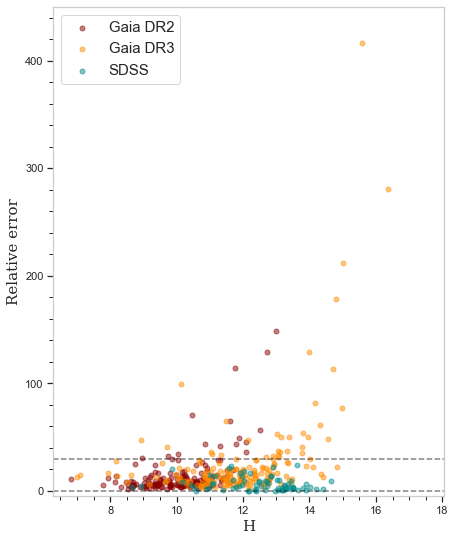

In [112]:
# Todos los asteroides
fig, ax = plt.subplots(figsize=(7, 9))

#plt.subplot(1,2, 1)
plt.scatter(HG_GaiaDR2.loc[:,'H'],HG_GaiaDR2.loc[:,'%error_H'],
             s=25,alpha=0.5,color='darkred', label='Gaia DR2')

plt.scatter(HG_GaiaDR3.loc[:,'H'],HG_GaiaDR3.loc[:,'%error_H'],
             s=25,alpha=0.5,color='darkorange', label='Gaia DR3')

plt.scatter(HG_SDSS.loc[:,'H'],HG_SDSS.loc[:,'%error_H'],
             s=25,alpha=0.5,color='darkcyan', label='SDSS')

plt.axhline(0,linestyle='--', color='black', alpha=0.5)
plt.axhline(30,linestyle='--', color='black', alpha=0.5)

plt.ylabel('Relative error', fontsize=15,fontfamily='serif')
plt.xlabel('H', fontsize=15,fontfamily='serif')

plt.minorticks_on()
plt.grid(False)
ax.tick_params(which='both', bottom=True, left=True)
plt.ylim(-5,450)
plt.legend( fontsize=15)


## Asteroides comunes
#plt.subplot(1,2, 2)
#plt.scatter(HGGaia_.loc[:,'H'],HGGaia_.loc[:,'%error_H'],
#             s=25,alpha=0.5,color='darkred', label='Gaia DR2+DR3')
#
#plt.scatter(HGSDSS_.loc[:,'H'],HGSDSS_.loc[:,'%error_H'],
#             s=25,alpha=0.5,color='darkcyan', label='SDSS')
#
#plt.axhline(0,linestyle='--', color='black', alpha=0.5)
#plt.axhline(30,linestyle='--', color='black', alpha=0.5)
#
#
#plt.xlabel('H', fontsize=15,fontfamily='serif')
#plt.minorticks_on()
#plt.grid(False)
#ax.tick_params(which='both', bottom=True, left=True)
#plt.legend( fontsize=15)

De igual manera, se estudia el error relativo cuando se combinan las observaciones

In [222]:
print('Catálogo combinado \n  Total observaciones:',HG_all.shape[0])
print('  Observaciones con error relativo mayor al 30%:', len(HG_all[HG_all.loc[:,'%error_H'] > 30].index))
print('  Observaciones con error relativo NaN:', len(HG_all[HG_all.loc[:,'%error_H'].isna()].index))

Catálogo combinado 
  Total observaciones: 575
  Observaciones con error relativo mayor al 30%: 134
  Observaciones con error relativo NaN: 72


(-5.0, 450.0)

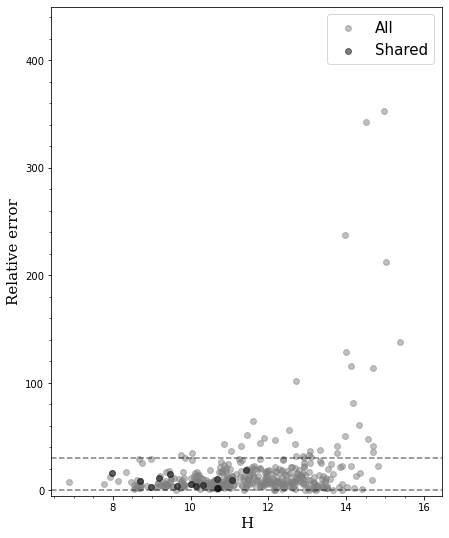

In [51]:
fig, ax = plt.subplots(figsize=(7,9))

plt.scatter(HG_all.loc[:,'H_fit'],HG_all.loc[:,'%error_H'],
             s=35,alpha=0.5,color='grey', label ='All')


plt.scatter(HG_match.loc[:,'H_fit'],HG_match.loc[:,'%error_H'],
             s=35,alpha=0.5,color='black', label='Shared')


plt.axhline(0,linestyle='--', color='black', alpha=0.5)
plt.axhline(30,linestyle='--', color='black', alpha=0.5)

plt.ylabel('Relative error', fontsize=15,fontfamily='serif')
plt.xlabel('H', fontsize=15,fontfamily='serif')

plt.minorticks_on()
plt.grid(False)
ax.tick_params(which='both', bottom=True, left=True)
plt.legend( fontsize=15)


plt.ylim(-5,450)


### Plot H vs H JPL

Para todos los asteroides. A partir del DF de los parámetros HG de Pyedra, añado desde JPL el valor de H y se grafica, previamente eliminando la información sobre asteroides con errores relativos de H mayores del 30%.

In [78]:
HG_all.drop(HG_all[HG_all.loc[:,'%error_H'] > 30].index, inplace = True)
HG_all.drop(HG_all[HG_all.loc[:,'%error_H'].isna()].index, inplace = True)

In [59]:
from astroquery.jplhorizons import Horizons

for i in HG_all.index:   
    number=HG_all.loc[:,'id'][i]
    print('-------------------------------------------------------')
    print(i)
    print(number)
    
    ast= Horizons(id=int(number), id_type='smallbody')  
    ast=ast.elements()
    HG_all.loc[i,'H']=ast['H']
    HG_all.loc[i,'G']=ast['G']
    print(HG_all.loc[i,['id','H','G']])

-------------------------------------------------------
0
588
id    588.00
H       8.27
G       0.15
Name: 0, dtype: float64
-------------------------------------------------------
1
617
id    617.00
H       8.18
G       0.15
Name: 1, dtype: float64
-------------------------------------------------------
2
624
id    624.00
H       7.45
G       0.15
Name: 2, dtype: float64
-------------------------------------------------------
3
659
id    659.00
H       8.71
G       0.15
Name: 3, dtype: float64
-------------------------------------------------------
4
884
id    884.00
H       8.69
G       0.15
Name: 4, dtype: float64
-------------------------------------------------------
5
911
id    911.00
H       7.99
G       0.15
Name: 5, dtype: float64
-------------------------------------------------------
6
1143
id    1143.00
H        8.37
G        0.15
Name: 6, dtype: float64
-------------------------------------------------------
8
1173
id    1173.00
H        8.86
G        0.15
Name: 8, dtype: 

id    4832.00
H       10.08
G        0.15
Name: 70, dtype: float64
-------------------------------------------------------
71
4833
id    4833.00
H        9.05
G        0.15
Name: 71, dtype: float64
-------------------------------------------------------
72
4834
id    4834.00
H        9.23
G        0.15
Name: 72, dtype: float64
-------------------------------------------------------
73
4835
id    4835.00
H       10.72
G        0.15
Name: 73, dtype: float64
-------------------------------------------------------
74
4836
id    4836.00
H        9.59
G        0.15
Name: 74, dtype: float64
-------------------------------------------------------
77
4946
id    4946.00
H       10.22
G        0.15
Name: 77, dtype: float64
-------------------------------------------------------
78
5012
id    5012.00
H       10.66
G        0.15
Name: 78, dtype: float64
-------------------------------------------------------
79
5023
id    5023.00
H       10.47
G        0.15
Name: 79, dtype: float64
----------------

id    12972.00
H        11.77
G         0.15
Name: 146, dtype: float64
-------------------------------------------------------
147
13060
id    13060.00
H        10.82
G         0.15
Name: 147, dtype: float64
-------------------------------------------------------
148
13182
id    13182.00
H        10.82
G         0.15
Name: 148, dtype: float64
-------------------------------------------------------
150
13184
id    13184.00
H        11.18
G         0.15
Name: 150, dtype: float64
-------------------------------------------------------
151
13372
id    13372.00
H        11.41
G         0.15
Name: 151, dtype: float64
-------------------------------------------------------
152
14268
id    14268.00
H        10.59
G         0.15
Name: 152, dtype: float64
-------------------------------------------------------
153
14690
id    14690.00
H        10.66
G         0.15
Name: 153, dtype: float64
-------------------------------------------------------
154
14792
id    14792.00
H        12.26
G         0

id    24312.00
H        11.71
G         0.15
Name: 217, dtype: float64
-------------------------------------------------------
218
24357
id    24357.00
H        11.83
G         0.15
Name: 218, dtype: float64
-------------------------------------------------------
221
24451
id    24451.00
H        10.48
G         0.15
Name: 221, dtype: float64
-------------------------------------------------------
222
24452
id    24452.00
H        12.03
G         0.15
Name: 222, dtype: float64
-------------------------------------------------------
223
24472
id    24472.00
H        11.69
G         0.15
Name: 223, dtype: float64
-------------------------------------------------------
225
24506
id    24506.00
H        10.77
G         0.15
Name: 225, dtype: float64
-------------------------------------------------------
226
24537
id    24537.00
H        11.21
G         0.15
Name: 226, dtype: float64
-------------------------------------------------------
230
25937
id    25937.00
H        12.33
G         0

id    54672.00
H        11.87
G         0.15
Name: 308, dtype: float64
-------------------------------------------------------
309
55457
id    55457.00
H        12.17
G         0.15
Name: 309, dtype: float64
-------------------------------------------------------
310
55460
id    55460.00
H        12.28
G         0.15
Name: 310, dtype: float64
-------------------------------------------------------
313
56976
id    56976.00
H        11.65
G         0.15
Name: 313, dtype: float64
-------------------------------------------------------
315
57904
id    57904.00
H        12.27
G         0.15
Name: 315, dtype: float64
-------------------------------------------------------
316
58008
id    58008.00
H        11.71
G         0.15
Name: 316, dtype: float64
-------------------------------------------------------
317
58084
id    58084.00
H        12.88
G         0.15
Name: 317, dtype: float64
-------------------------------------------------------
322
63210
id    63210.00
H        12.25
G         0

id    160135.00
H         12.04
G          0.15
Name: 422, dtype: float64
-------------------------------------------------------
423
160164
id    160164.00
H         13.22
G          0.15
Name: 423, dtype: float64
-------------------------------------------------------
424
160465
id    160465.00
H         13.59
G          0.15
Name: 424, dtype: float64
-------------------------------------------------------
426
161017
id    161017.00
H         12.69
G          0.15
Name: 426, dtype: float64
-------------------------------------------------------
427
161020
id    161020.00
H         13.44
G          0.15
Name: 427, dtype: float64
-------------------------------------------------------
428
161024
id    161024.00
H         12.47
G          0.15
Name: 428, dtype: float64
-------------------------------------------------------
429
161044
id    161044.00
H         12.46
G          0.15
Name: 429, dtype: float64
-------------------------------------------------------
430
161484
id    161484.

id    354342.00
H         13.09
G          0.15
Name: 558, dtype: float64
-------------------------------------------------------
559
356897
id    356897.00
H         12.89
G          0.15
Name: 559, dtype: float64
-------------------------------------------------------
563
362981
id    362981.00
H         12.66
G          0.15
Name: 563, dtype: float64
-------------------------------------------------------
566
377224
id    377224.00
H         12.95
G          0.15
Name: 566, dtype: float64
-------------------------------------------------------
568
381409
id    381409.00
H         13.10
G          0.15
Name: 568, dtype: float64


In [62]:
data_all = pd.DataFrame()
data_all['H'] = HG_all.loc[:,'H']
data_all['H_fit'] = HG_all.loc[:,'H_fit']
data_all['Observations'] = HG_all.loc[:,'observations']
data_all['Error H (%)'] = HG_all.loc[:,'%error_H']

data_all

,H,H_fit,Observations,Error H (%)
0,8.27,7.942679,18,12.102746
1,8.18,8.350498,27,16.763720
2,7.45,6.881491,53,8.025588
3,8.71,8.538537,42,5.480325
4,8.69,7.994719,22,16.158124
...,...,...,...,...
558,13.09,13.428605,3,1.988919
559,12.89,12.212120,11,3.606745
563,12.66,12.400744,3,2.066948
566,12.95,13.296495,18,14.037166


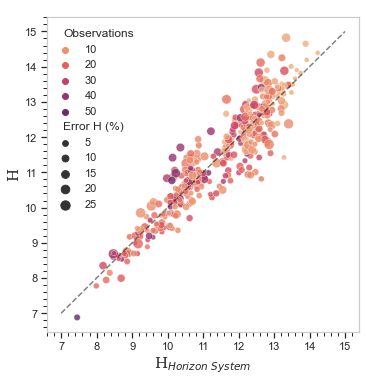

In [67]:
sn.set_theme(style="whitegrid")


# Datos
cmap = sn.cubehelix_palette(rot=-.2, as_cmap=True)
g = sn.relplot(
    data=data_all,
    x="H", y="H_fit",
    hue="Observations", size="Error H (%)",
    palette="flare", sizes=(20, 100), alpha=0.8, legend='auto')


# Línea y=x
x = np.linspace(7,15)
y = x
plt.plot(x,y, '--', color = 'black', alpha=0.5)


# Gráfica
g.despine(left=False, bottom=False, right=False, top=False)
plt.xlabel(r'H$_{Horizon ~ System}$', fontsize=15,fontfamily='serif') 
plt.ylabel(r'H', fontsize=15,fontfamily='serif')
plt.minorticks_on()
plt.grid(False)
plt.tick_params(which='both', bottom=True, left=True)
plt.tight_layout
leg = g._legend
leg.set_bbox_to_anchor([0.32, 0.73]) 


Es interesante ver que los datos de Gaia DR3 son de mayor H en general en comparación con los anteriormente analizados

### Plot H vs G

Para datos de Gaia DR2, Gaia DR3, de SDSS y combinados, eliminando datos de error relativo de H mayor de 30%

In [259]:
HG_SDSS.drop(HG_SDSS[HG_SDSS.loc[:,'%error_H'] > 30].index, inplace = True)
HG_SDSS.drop(HG_SDSS[HG_SDSS.loc[:,'%error_H'].isna()].index, inplace = True)

HG_GaiaDR2.drop(HG_GaiaDR2[HG_GaiaDR2.loc[:,'%error_H'] > 30].index, inplace = True)
HG_GaiaDR2.drop(HG_GaiaDR2[HG_GaiaDR2.loc[:,'%error_H'].isna()].index, inplace = True)

HG_GaiaDR3.drop(HG_GaiaDR3[HG_GaiaDR3.loc[:,'%error_H'] > 30].index, inplace = True)
HG_GaiaDR3.drop(HG_GaiaDR3[HG_GaiaDR3.loc[:,'%error_H'].isna()].index, inplace = True)

HG_Gaia_all.drop(HG_Gaia_all[HG_Gaia_all.loc[:,'%error_H'] > 30].index, inplace = True)
HG_Gaia_all.drop(HG_Gaia_all[HG_Gaia_all.loc[:,'%error_H'].isna()].index, inplace = True)

Text(1.55, 7.5, '--')

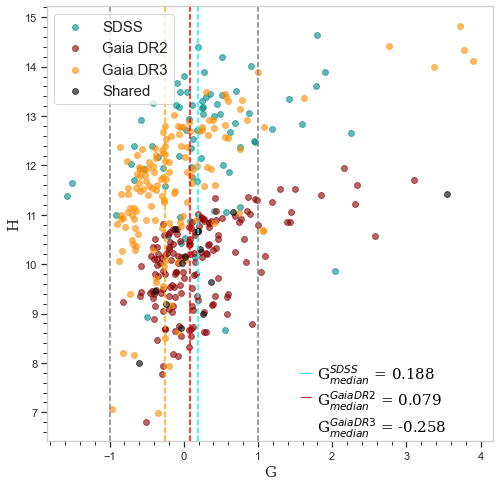

In [280]:
sn.set_theme(style="whitegrid")

fig, ax =  plt.subplots(figsize=(8,8))


# SDSS
ax.scatter(HG_SDSS.to_numpy()[:,3],
           HG_SDSS.to_numpy()[:,1], 
           s=35,alpha=0.6,color='darkcyan', label='SDSS')


# Gaia DR2
ax.scatter(HG_GaiaDR2.to_numpy()[:,3],
           HG_GaiaDR2.to_numpy()[:,1], 
           s=35,alpha=0.6,color='darkred', label='Gaia DR2')

# Gaia DR3
ax.scatter(HG_GaiaDR3.to_numpy()[:,3],
           HG_GaiaDR3.to_numpy()[:,1], 
           s=35,alpha=0.6,color='darkorange', label='Gaia DR3')


# Shared
ax.scatter(HG_match.to_numpy()[:,3],
           HG_match.to_numpy()[:,1], 
           s=35,alpha=0.6,color='black', label='Shared')



plt.xlabel(r'G', fontsize=15,fontfamily='serif') 
plt.ylabel(r'H', fontsize=15,fontfamily='serif')
plt.minorticks_on()
plt.grid(False)
plt.tick_params(which='both', bottom=True, left=True)
plt.legend( fontsize=15, loc='upper left')

plt.axvline(x=1, ls='--', color='grey', alpha=1)
plt.axvline(x=-1, ls='--', color='grey', alpha=1)



# Representar también la mediana de G

# Mediana de ambos por separado y juntar

medianSDSS = np.median(HG_SDSS.to_numpy()[:,3])
medianGaiaDR2 = np.median(HG_GaiaDR2.to_numpy()[:,3])
medianGaiaDR3 = np.median(HG_GaiaDR3.to_numpy()[:,3])
median = (medianSDSS + medianGaiaDR2 + medianGaiaDR3)/3

#plt.axvline(x=mean, ls='--', color='black', alpha=1)
plt.axvline(x=medianSDSS, ls='--', color='cyan', alpha=1)
plt.axvline(x=medianGaiaDR2, ls='--', color='red', alpha=1)
plt.axvline(x=medianGaiaDR3, ls='--', color='orange', alpha=1)


plt.text(1.8,8, 
         r'G$^{SDSS}_{median}$ = '+str(round(medianSDSS,3))+
         '\nG$^{Gaia DR2}_{median}$ = '+str(round(medianGaiaDR2,3))
         +'\nG$^{Gaia DR3}_{median}}$ = '+str(round(medianGaiaDR3,3)) 
         ,fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.text(1.55,8, 
         r'--',
         fontsize=20, color='cyan', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(1.55,7.5, 
         r'--',
         fontsize=20, color='red', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')


#print(median,np.median(df['G_fit'])) 
#print((medianSDSS-medianGaia)/medianSDSS*100)


### Plot densidad de G

In [145]:
## Eliminar errores mayores al 30% o NaN
df_all.drop(df_all[df_all.loc[:,'%error_H'] > 30].index, inplace = True)
df_all.drop(df_all[df_all.loc[:,'%error_H'].isna()].index, inplace = True)

df_match.drop(df_match[df_match.loc[:,'%error_H'] > 30].index, inplace = True)
df_match.drop(df_match[df_match.loc[:,'%error_H'].isna()].index, inplace = True)


0.10917323312101798


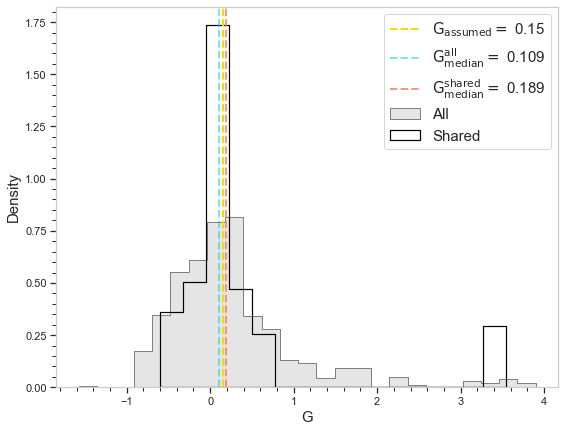

In [119]:
sn.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(9,7))

g = sn.histplot(data=df_all, x="G_fit", bins=25, 
             color='grey', alpha=0.2,  
             element='step',stat="density", common_norm=False, label='All')

sn.histplot(data=df_match, x="G_fit", bins=15, 
             color='black', alpha=0.0, 
             element='step',stat="density", common_norm=False, label='Shared', linewidth=1.2)


g.axvline(x=0.15, ymin=0, ymax=01.46, color="gold", linestyle="--", linewidth=2, 
          label=r'$\mathrm{G_{assumed}} =$ 0.15', alpha=1)
g.axvline(x=np.median(df_all['G_fit']), ymin=0, ymax=01.46, color="darkturquoise", linestyle="--", alpha=0.5,
          linewidth=2, label=r'$\mathrm{G_{median}^{all}} = $ '+str(round(np.median(df_all['G_fit']),3)))
g.axvline(x=np.median(df_match['G_fit']), ymin=0, ymax=01.46, color="coral", linestyle="--", alpha=0.8,
          linewidth=2, label=r'$\mathrm{G_{median}^{shared}} = $ '+str(round(np.median(df_match['G_fit']),3)))

#g.axvline(x=np.mean(HG_Gaia.to_numpy()[:,3]), ymin=0, ymax=01.46, color="pink", linestyle="--", 
#          linewidth=2, label=r'$\mathrm{G_{median}^{Gaia}} = $ '+str(round(np.mean(HG_Gaia.to_numpy()[:,3]),3)))


g.set_xlabel("G", fontsize = 15)
g.set_ylabel("Density", fontsize = 15)
plt.legend(loc='upper right', fontsize=15)

plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)

print(np.median(df_all['G_fit']))

Si se elimina el asteroide que tiene un valor de G alto

In [275]:
df_match.drop(df_match[df_match.loc[:,'G_fit'] > 3].index, inplace = True)
print(np.median(df_match['G_fit']))

0.022935721078215066


### Plot Curva de fase
 
Para algunos asteroides, solo con Gaia y con Gaia+SDSS

#### Gaia

2357:  H          8.608242
error_H    0.566316
G         -0.170243
error_G    0.301475
Name: 5, dtype: float64
5012:  H          10.764806
error_H     1.068551
G           0.306237
error_G     0.422242
Name: 12, dtype: float64


Text(10, 10.65, '(5012) Eurymedon\nH = 10.76$\\pm$ 1.07\nG = 0.31$\\pm$ 0.42')

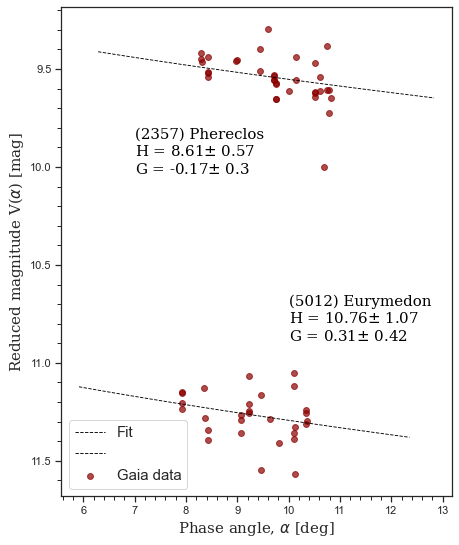

In [197]:
#number = np.array(df_match.loc[:,'id'].drop_duplicates())
number = [2357, 5012]

sn.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(7,9))

groups = df_match.groupby(df_match.id)


for i in number:
    
    ast =  groups.get_group(i)
    
    dfGaia_ = ast[ast['Name'].isna()]
    
    ax.scatter(dfGaia_.loc[:,'alpha'], dfGaia_.loc[:,'v'], s=35,alpha=0.7, color='darkred')
    
    alp = np.linspace(dfGaia_.loc[:,'alpha'].min()-2, dfGaia_.loc[:,'alpha'].max()+2,100)  # Array de alpha para hacer el plot del ajuste, tantos como quiera
    H_fit = dfGaia_.loc[:,'H_fit'].values[0]
    G_fit = dfGaia_.loc[:,'G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)

    v_fit = V_fit(alp,H_ast,G_ast)
    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", color='black', alpha=1) 



plt.xlabel(r"Phase angle, $\alpha$ [deg]", fontsize=15,fontfamily='serif')
plt.ylabel( r"Reduced magnitude V($\alpha$) [mag]", fontsize=15,fontfamily='serif')
plt.gca().invert_yaxis()
plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)

#plt.ylim(10.25,9.35)
#plt.xlim(7.5,12)
plt.legend( ['Fit',None,'Gaia data'], fontsize=15)


print('2357: ',HG_Gaia.loc[5,['H','error_H','G','error_G']] )
print('5012: ',HG_Gaia.loc[12,['H','error_H','G','error_G']] )


plt.text(7,9.8, 
         r'(2357) Phereclos'
         '\nH = '+str(round(8.608242,2))+ '$\pm$ ' +str(round(0.566316,2))+
         '\nG = '+str(round(-0.170243,2))+ '$\pm$ ' +str(round(0.301475,2)),
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.text(10,10.65, 
         r'(5012) Eurymedon'
         '\nH = '+str(round(10.764806,2))+ '$\pm$ ' +str(round(1.068551,2))+
         '\nG = '+str(round(0.306237 ,2))+ '$\pm$ ' +str(round(0.422242,2)),
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')


####  Gaia + SDSS

2357:  H_fit      8.989864
error_H    0.246607
G_fit      0.255817
error_G    0.096429
Name: 1, dtype: float64
5012:  H_fit      10.677949
error_H     0.279925
G_fit       0.188749
error_G     0.111194
Name: 6, dtype: float64


Text(6, 10.65, '(5012) Eurymedon\nH = 10.68$\\pm$ 0.28\nG = 0.19$\\pm$ 0.11')

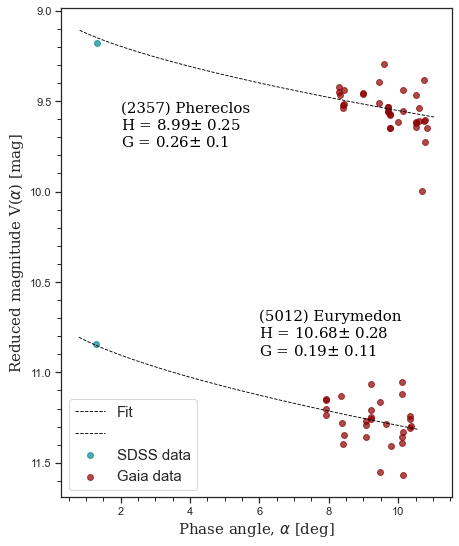

In [196]:
number = [2357, 5012]

sn.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(7,9))

groups = df_match.groupby(df_match.id)

for i in number:
    
    ast =  groups.get_group(i)
    
    dfGaia_ = ast[ast['Name'].isna()]
    dfSloan_ = ast[ast['Name'].notna()]
    
    ax.scatter(dfSloan_.loc[:,'alpha'], dfSloan_.loc[:,'v'], s=35,alpha=0.7,  color='darkcyan')
    ax.scatter(dfGaia_.loc[:,'alpha'], dfGaia_.loc[:,'v'], s=35,alpha=0.7, color='darkred')
    
    alp = np.linspace(ast['alpha'].min()-0.5, ast['alpha'].max()+0.2,100)  # Array de alpha para hacer el plot del ajuste, tantos como quiera
    H_fit = ast['H_fit'].values[0]
    G_fit = ast['G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)

    v_fit = V_fit(alp,H_ast,G_ast)
    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", color='black', alpha=1)
    

print('2357: ',HG_match.loc[1,['H_fit','error_H','G_fit','error_G']] )
print('5012: ',HG_match.loc[6,['H_fit','error_H','G_fit','error_G']] )
      

plt.xlabel(r"Phase angle, $\alpha$ [deg]", fontsize=15,fontfamily='serif')
plt.ylabel( r"Reduced magnitude V($\alpha$) [mag]", fontsize=15,fontfamily='serif')
plt.gca().invert_yaxis()
plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)

plt.legend( ['Fit',None,'SDSS data','Gaia data'], fontsize=15)



plt.text(2,9.5, 
         r'(2357) Phereclos'
         '\nH = '+str(round(8.989864 ,2))+ '$\pm$ ' +str(round(0.246607,2))+
         '\nG = '+str(round(0.255817 ,2))+ '$\pm$ ' +str(round(0.096429,2)),
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.text(6,10.65, 
         r'(5012) Eurymedon'
         '\nH = '+str(round(10.677949 ,2))+ '$\pm$ ' +str(round(0.279925,2))+
         '\nG = '+str(round(0.188749  ,2))+ '$\pm$ ' +str(round(0.111194,2)),
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

In [273]:
df_GaiaDR2.rename(columns={'Number': 'id'}, inplace=True)

coinc = pd.merge(df_SDSS.loc[:,'id'], df_GaiaDR2.loc[:,'id'], on=['id'], how='inner')
coinc = coinc.drop_duplicates()
coincidentes = coinc.to_numpy().reshape(1,len(coinc))


df_SDSS_DR2 = df[df['id'].isin(coincidentes[0,:])]

print(len(df_SDSS_DR2.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(df_SDSS_DR2),'observations')


45 asteroids with a total of 1037 observations


In [272]:
df_GaiaDR3.rename(columns={'Number': 'id'}, inplace=True)

coinc = pd.merge(df_SDSS.loc[:,'id'], df_GaiaDR3.loc[:,'id'], on=['id'], how='inner')
coinc = coinc.drop_duplicates()
coincidentes = coinc.to_numpy().reshape(1,len(coinc))


df_SDSS_DR3 = df[df['id'].isin(coincidentes[0,:])]

print(len(df_SDSS_DR3.loc[:,'id'].drop_duplicates()), 'asteroids with a total of',len(df_SDSS_DR3),'observations')


81 asteroids with a total of 1989 observations
